HydroShare GSL Info includes area volume data, lake level, volume, gsl basin digital elevation model, and bathymetry (underwater depths)

Citation for HydroShareGSLInfo: Tarboton, D. (2022). Collection of Great Salt Lake Data, HydroShare, http://www.hydroshare.org/resource/b6c4fcad40c64c4cb4dd7d4a25d0db6e

# Names:
Audrey Pohl, u0497618@utah.edu, u0497618 

Clarissa Seebohm, u0575630@utah.edu, u0575630 

Joseph Wirthlin, u0936690@utah.edu, u0935590 

# Project Description <br>
We all enjoy outdoor activities in Salt Lake City such as skiing, hiking, and camping in the wilderness surrounding Salt Lake City. For this reason, we value the Great Salt Lake for its contribution to the local ecosystem. With increased snowfall this winter, we are curious how much it will impact the level of the Salt Lake. Snowfall isn’t the only factor that can impact the water level. We will also analyze rainfall, total precipitation, snowfall, snow-water equivalent, and water usage in order to answer the following questions: Do rainfall and snowfall have different effects on water levels of the GSL? Does precipitation have a significant effect on water levels of GSL? Is more water diverted in wet years that reduce the effects on water levels?  Does precipitation or water usage have a more significant effect on water levels? We hope that these questions could provide insight on how the state of Utah needs to manage its water to preserve our ecosystem while supporting local business adequately. Discovering the impacts of different factors on the levels of the GSL could also reveal the most directly impactful ways to preserve the local ecosystem.  

# Data and Data Description <br>

In [84]:
import datetime
import pandas as pd 
lake_levels = pd.read_csv('monthly', sep = '\t', comment = '#') 
snow_water = pd.read_csv('state_of_utah_snow_water.csv') # snow water equivalent

print(lake_levels)

october_snow = snow_water.loc[:30].mean()
november_snow = snow_water.loc[31:60].mean()
december_snow = snow_water.loc[61:91].mean()
january_snow = snow_water.loc[92:122].mean()
february_snow = snow_water.loc[124:151].mean()
march_snow = snow_water.loc[152:182].mean()
april_snow = snow_water.loc[183:212].mean()
may_snow = snow_water.loc[213:243].mean()
june_snow = snow_water.loc[244:273].mean()
july_snow = snow_water.loc[274:304].mean()
august_snow = snow_water.loc[305:334].mean()
september_snow = snow_water.loc[335:365].mean()

def populate_snow_datetime(data, month, start_year, df):
    for i in range(len(data)-10):
        temp = pd.DataFrame([[datetime.date(start_year+i,month,20), data[i]]],columns=['date','swe'])
        df = pd.concat([df,temp], ignore_index=True)
    return df

swe = pd.DataFrame(columns=['date','swe'])

swe = populate_snow_datetime(october_snow, 10, 1981, swe)
swe = populate_snow_datetime(november_snow, 11, 1981, swe)
swe = populate_snow_datetime(december_snow, 12, 1981, swe)
swe = populate_snow_datetime(january_snow, 1, 1981, swe)
swe = populate_snow_datetime(february_snow, 2, 1981, swe)
swe = populate_snow_datetime(march_snow, 3, 1981, swe)
swe = populate_snow_datetime(april_snow, 4, 1981, swe)
swe = populate_snow_datetime(may_snow, 5, 1981, swe)
swe = populate_snow_datetime(june_snow, 6, 1981, swe)
swe = populate_snow_datetime(july_snow, 7, 1981, swe)
swe = populate_snow_datetime(august_snow, 8, 1981, swe)
swe = populate_snow_datetime(september_snow, 9, 1981, swe)

def populate_lake_datetime(data, df):
    for i in range(len(data)-1):
        temp = pd.DataFrame([[datetime.date(int(data['year_nu'][i+1]),int(data['month_nu'][i+1]),20), float(data['mean_va'][i+1])]],columns=['date','lake_level'])
        df = pd.concat([df,temp], ignore_index=True)
    return df

lk_lvl = pd.DataFrame(columns=['date','lake_level'])
lk_lvl = populate_lake_datetime(lake_levels, lk_lvl)

print(lk_lvl)


    agency_cd   site_no parameter_cd   ts_id year_nu month_nu   mean_va
0          5s       15s           5s      3n      4s       2s       12n
1        USGS  10010100        62614  178324    1989       10  4203.916
2        USGS  10010100        62614  178324    1989       11  4203.743
3        USGS  10010100        62614  178324    1989       12   4203.79
4        USGS  10010100        62614  178324    1990        1  4203.848
..        ...       ...          ...     ...     ...      ...       ...
394      USGS  10010100        62614  178324    2022        7  4189.626
395      USGS  10010100        62614  178324    2022        8  4189.352
396      USGS  10010100        62614  178324    2022        9  4188.983
397      USGS  10010100        62614  178324    2022       10  4188.723
398      USGS  10010100        62614  178324    2022       11   4188.59

[399 rows x 7 columns]


/var/folders/_8/kmm0qn3s0h986z7s1dmqcpsc0000gn/T/ipykernel_11297/66261981.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  october_snow = snow_water.loc[:30].mean()
/var/folders/_8/kmm0qn3s0h986z7s1dmqcpsc0000gn/T/ipykernel_11297/66261981.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  november_snow = snow_water.loc[31:60].mean()
/var/folders/_8/kmm0qn3s0h986z7s1dmqcpsc0000gn/T/ipykernel_11297/66261981.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  december_snow = snow_wat

           date  lake_level
0    1989-10-20    4203.916
1    1989-11-20    4203.743
2    1989-12-20    4203.790
3    1990-01-20    4203.848
4    1990-02-20    4203.868
..          ...         ...
393  2022-07-20    4189.626
394  2022-08-20    4189.352
395  2022-09-20    4188.983
396  2022-10-20    4188.723
397  2022-11-20    4188.590

[398 rows x 2 columns]


The `lake_levels` variable comes from a United States Geological Survey (USGS) database of monthly Great Salt Lake water elevations. The values are monthly averages of the surface elevation of the lake in feet from sea level. The dataset has monthly data from October of 1989 to November of 2022. 
<br>
<br>
The `snow_water` variable comes from (fill this in)


# Ethical Data Concerns
We want to make sure that the data that we use will not cause harm to any stakeholders. In order to do so, we have identified the primary stakeholders related to this research are: Utah residents, the Utah government and policymakers, and Utah agriculture and watershed-reliant businesses. In order to prevent causing any harm to any individual stakeholder, we have decided to use water usage data on a state level so as not to unintentionally put blame on any types of water users. This is because some research that has been done in the past has left certain stakeholders feeling as if they are receiving a disproportionate amount of the blame and are under increasing pressure to decrease water use as a result of that research. We want to avoid this, so our data will not breakdown any type of water user to protect those stakeholders from experiencing something similar.  

# Methods <br>

To determine the best combination of variables that describe the GSL water elevation, we will optimize regression, linear regression, or logarithmic regression depending on which we find to suit the data best. Combining machine learning with regression methods will optimize the regressions and in an analytical way determine which dedcribes the data best. The library we will primarily use is make_regression from sci-kit learn. We will use pyplot to plot our results in interesting ways as the models optimize. We will also use pandas to clean our data to input to our regression models. 
<br>
<br>
To help users vizualize the relationships between factors of water elevation in the GSL, we will create a data visualization dashboard. For this Dash is the best option we have found. You can make highly interactive visualiztions with a Dash Python library. It requires some knowledge of Java and CSS which our team members have. Luckily you don't NEED to know either to create an awesome dashboard. We plan to allow the user to choose a date range, and variables to explore relationships themsevles. Our regression optimization analysis will also be included on the dashboard. 

https://machinelearningmastery.com/optimize-regression-models/ ( don't keep this in the submission but it's where I got above info from )
https://realpython.com/python-dash/ (same thing as above)

# Preliminary Results <br>

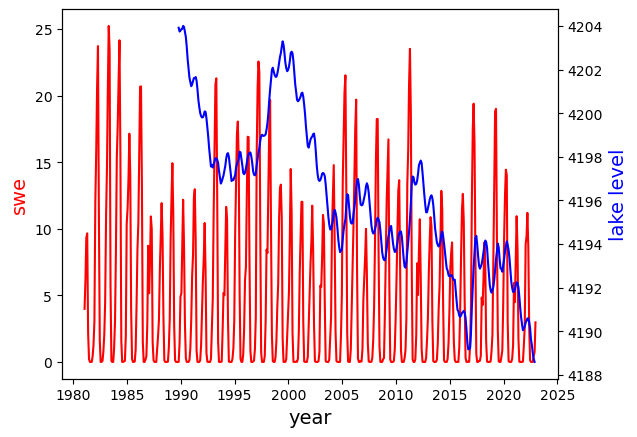

In [108]:
import matplotlib.pyplot as plt

swe = swe.sort_values(by='date')
#plt.plot(swe['date'], swe['swe'])
#plt.plot(lk_lvl['date'], lk_lvl['lake_level'])


# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(swe['date'],
        swe['swe'],
        color="red")
# set x-axis label
ax.set_xlabel("year", fontsize = 14)
# set y-axis label
ax.set_ylabel("swe",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(lk_lvl['date'], lk_lvl['lake_level'],color="blue")
ax2.set_ylabel("lake level",color="blue",fontsize=14)
plt.show()



# Peer Review
Amit Galatzer, Dasha Romanova, Justin Schwendiman 

One of the main concerns that was brought up during this conversation was to make sure that we have a large enough sample size. We were considering using monthly data which would only give us 12 observations for each year that we use. Originally, we were considering only using about 10 years of data but this would only give us 120 observations. For that reason, it was brought up that we should use many more years to get a larger sample size that will aid us in finding more interesting trends. 

It was also mentioned that it could be interesting to include variables such as population growth or GDP growth to capture any effect of water usage that these types of events may cause. This would be able to create a better analysis because it would weed out some other important factors that could also be contributing to the lake levels. 

# Milestones Completed <br>

We have found, imported, and cleaned GSL lake elevation data, and snow-water equivalent data which was dated for completion by 4/7.

# Upcoming Milestones <br>

The upcoming milestone is to perform and plot exploratory analysis on the data. This is dated for completion by 4/14. This includes the optimization of regression with machine learning. We also need to complete root mean squared error (RMSE) for all groups of data in the project. 
<br>
<br>
The main analysis and dashboard completion is predicted to be completed by 4/21 which is the due date for this project. 

# Potential Modifications <br>

This section is optional. (delete?)

# Project Summary 

# Asessment <br>

Is your project on track?